## Observations and Insights 

In [179]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Matplotlib\Pymaceuticals Case Assignment\Mouse_metadata.csv")
study_results = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Matplotlib\Pymaceuticals Case Assignment\Study_results.csv")

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [180]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [181]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dups = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
mice_dups.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [182]:
# Optional: Get all the data for the duplicate mouse ID. 
# Name the variable as the mouse you want, call on the combined df, .loc to locate the exact mouse
# in the exact column
g989 = combined_df.loc[combined_df['Mouse ID'] == 'g989']
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [183]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_dropped = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
dup_dropped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [184]:
# Checking the number of mice in the clean DataFrame
dup_dropped['Mouse ID'].nunique()


249

In [185]:
dup_dropped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [186]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_stats = dup_dropped.groupby('Drug Regimen')

# Create a dataframe for the statistics

mean = sum_stats['Tumor Volume (mm3)'].mean()
median = sum_stats['Tumor Volume (mm3)'].median()
variance = sum_stats['Tumor Volume (mm3)'].var()
stdev = sum_stats['Tumor Volume (mm3)'].std()
sem = sum_stats['Tumor Volume (mm3)'].sem()

stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "STDEV": stdev, "SEM": sem})
stats

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_stats = dup_dropped.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

agg_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [188]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Prepare the data: Determine the mouse count for each drug

drug_used = dup_dropped.groupby('Drug Regimen')
drug_used
mouse_count = drug_used['Mouse ID'].count()
mouse_count



# WHEN RUN, YOU WILL HAVE A COUNT OF HOW MANY MICE A DRUG WAS TESTED ON


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

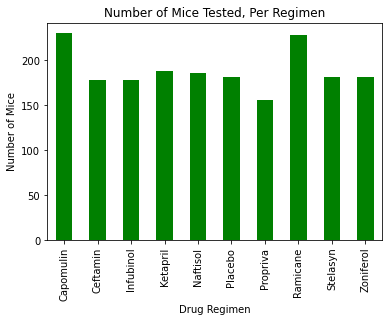

<Figure size 432x288 with 0 Axes>

In [189]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

pandas_barchart = mouse_count.plot(kind='bar', facecolor = 'green', title = 'Number of Mice Tested, Per Regimen')
pandas_barchart.set_xlabel("Drug Regimen")
pandas_barchart.set_ylabel('Number of Mice')

plt.show()
plt.tight_layout()

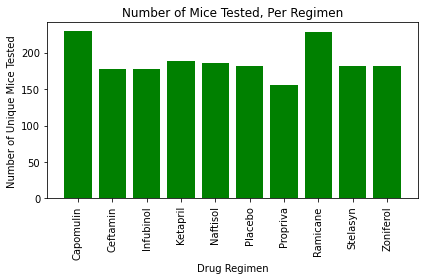

In [190]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
pyplot_bar = dup_dropped['Drug Regimen'].value_counts()
y_axis = mouse_count.values
x_axis = mouse_count.index
plt.bar(x_axis, y_axis, color = 'g')
plt.title("Number of Mice Tested, Per Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show
plt.tight_layout()

In [191]:
dup_dropped


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [192]:
# Get a count of male and female mice

genders = dup_dropped['Sex'].value_counts()
genders

Male      958
Female    930
Name: Sex, dtype: int64

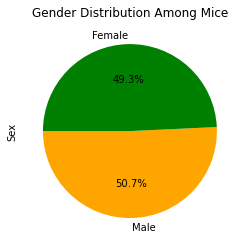

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pandas_pie = genders.plot(kind = 'pie', title = 'Gender Distribution Among Mice', autopct = "%1.1f%%", colors=["orange", "green"], startangle=180)
plt.show()

In [194]:
# Rename the 'genders' count for the pandas_pie

genders = genders.reset_index(inplace=False)
genders = genders.rename(columns={'index': 'Gender','Sex': 'Count'})
genders 

,Gender,Count
0,Male,958
1,Female,930


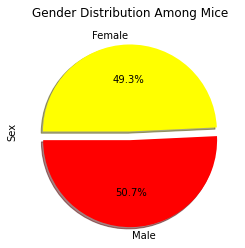

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The labels of each section of the pie chart
labels = genders['Gender']

# The values of each section of the pie chart
sizes = genders['Count']

# The colors of each section of the pie chart
colors = ["red", "yellow"]

# Explosion?
explode = (0.1, 0)

# Y Axis Label
plt.ylabel('Sex')

# Tell Pyplot you want a pie chart
plt.pie(sizes, labels = labels, colors = colors, explode=explode, startangle=180, shadow=True, autopct="%1.1f%%")  
plt.title("Gender Distribution Among Mice")
plt.show()

In [196]:
dup_dropped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [197]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = dup_dropped.groupby(['Mouse ID']) ['Timepoint'].max()
greatest

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [198]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(greatest, dup_dropped, on='Mouse ID')
merged

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [199]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomlin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [200]:
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes

capomulin = merged.loc[merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merged.loc[merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merged.loc[merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merged.loc[merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']   



In [201]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [202]:
# Capomulin (lq/uq = lower/upper quartile, lb/ub = lower/upper bound)
capomulin_tumor_volume = pd.Series(capomulin)

cquartiles = capomulin.quantile([.25, .5, .75])
lq_capomulin = cquartiles[.25]
uq_capomulin = cquartiles[.75]
iqr_capomulin = uq_capomulin - lq_capomulin
lb_capomulin = lq_capomulin - (1.5 * iqr_capomulin)
ub_capomulin = uq_capomulin + (1.5 * iqr_capomulin)

# Campomulin Outliers
capomulin_outliers = [vol for vol in capomulin if vol < lb_capomulin or vol > ub_capomulin]
len(capomulin_outliers)
distinct_capomulin_outliers = list(set(capomulin_outliers))
distinct_capomulin_outliers.sort()
distinct_capomulin_outliers

[23.34359787, 25.47214326]

In [203]:
# Ramicane (lq/uq = lower/upper quartile, lb/ub = lower/upper bound)
ramicane_tumor_volume = pd.Series(ramicane)

rquartiles = ramicane.quantile([.25, .5, .75])
lq_ramicane = rquartiles[.25]
uq_ramicane = rquartiles[.75]
iqr_ramicane = uq_ramicane - lq_ramicane
lb_ramicane = lq_ramicane - (1.5 * iqr_ramicane)
ub_ramicane = uq_ramicane + (1.5 * iqr_ramicane)

# Ramicane Outliers
ramicane_outliers = [vol for vol in ramicane if vol < lb_ramicane or vol > ub_ramicane]
len(ramicane_outliers)
distinct_ramicane_outliers = list(set(ramicane_outliers))
distinct_ramicane_outliers.sort()
distinct_ramicane_outliers

[22.05012627]

In [204]:
# Infubinol (lq/uq = lower/upper quartile, lb/ub = lower/upper bound)
infubinol_tumor_volume = pd.Series(infubinol)

iquartiles = infubinol.quantile([.25, .5, .75])
lq_infubinol = iquartiles[.25]
uq_infubinol = iquartiles[.75]
iqr_infubinol = uq_infubinol - lq_infubinol
lb_infubinol = lq_infubinol - (1.5 * iqr_infubinol)
ub_infubinol = uq_infubinol + (1.5 * iqr_infubinol)

# Infubinol Outliers
infubinol_outliers = [vol for vol in infubinol if vol < lb_infubinol or vol > ub_infubinol]
len(infubinol_outliers)
distinct_infubinol_outliers = list(set(infubinol_outliers))
distinct_infubinol_outliers.sort()
distinct_infubinol_outliers

[]

In [205]:
#Ceftamin (lq/uq = lower/upper quartile, lb/ub = lower/upper bound)
ceftamin_tumor_volume = pd.Series(ceftamin)

cefquartiles = ceftamin.quantile([.25, .5, .75])
lq_ceftamin = cefquartiles[.25]
uq_ceftamin = cefquartiles[.75]
iqr_ceftamin = uq_ceftamin - lq_ceftamin
lb_ceftamin = lq_ceftamin - (1.5 * iqr_ceftamin)
ub_ceftamin = uq_ceftamin + (1.5 * iqr_ceftamin)

# Ceftamin Outliers
ceftamin_outliers = [vol for vol in ceftamin if vol < lb_ceftamin or vol > ub_ceftamin]
len(ceftamin_outliers)
distinct_ceftamin_outliers = list(set(ceftamin_outliers))
distinct_ceftamin_outliers.sort()
distinct_ceftamin_outliers

[]

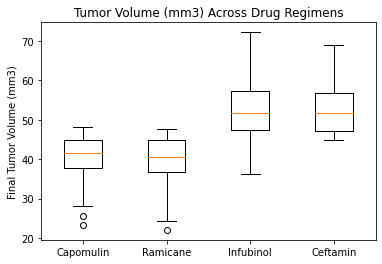

In [206]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# From in class exercise on quartiles

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) Across Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume], showfliers=True)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

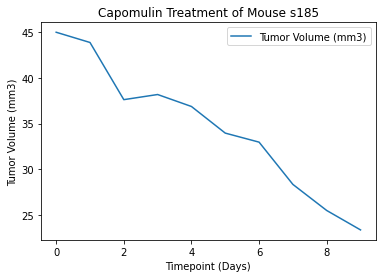

In [207]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = dup_dropped[dup_dropped['Mouse ID'].isin(['s185'])]
capomulin_mouse

tumor_time_data = capomulin_mouse[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_time_data

tumor_time_df = tumor_time_data.reset_index()
tumor_time_df

tumor_time_line = tumor_time_df[["Mouse ID", "Tumor Volume (mm3)"]]
tumor_time_line

tumor_time_line.plot.line()

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

In [208]:
dup_dropped


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


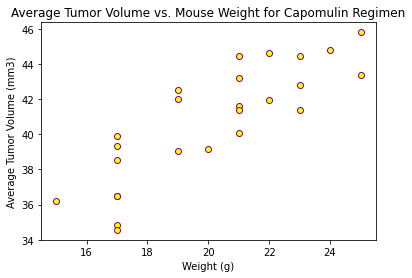

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_regimen = dup_dropped.loc[dup_dropped['Drug Regimen'] == 'Capomulin']
capomulin_average = capomulin_regimen.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], facecolors='yellow', edgecolors='purple')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

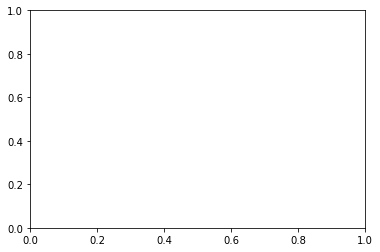

In [214]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
regress_values = capomulin_average["Weight (g)"]* slope + intercept
line_equation = f"y = {round(slope, 2)} x + {round(intercept,2)}"
plt.scatter(capomulin_average["Weight (g)"], regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumne (mm3)")
plt.title("Average Tumor Volume & Mouse Weight for Capomulin Regimen")
plt.show()